In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

In [2]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [3]:
def closest_centroid(sample,centroids):
    distances=[]
    for point in centroids:
        d=distance(sample,point)
        distances.append(d)
    closest=np.argmin(distances)
    return closest

In [4]:
def create_clusters(X_train,K,centroids):
    clusters=[[] for _ in range(K)]
    for index,sample in enumerate(X_train):
        centroid_index=closest_centroid(sample,centroids)
        clusters[centroid_index].append(index)
    return clusters
    

In [5]:
def get_centroids(clusters,K,num_features,X_train):
    centroids=np.zeros((K,num_features))
    for cluster_index,cluster in enumerate(clusters):
        cluster_mean=np.mean(X_train[cluster],axis=0)
        centroids[cluster_index]=cluster_mean
    return centroids
        

In [6]:
def is_converged(centroids_old,centroids,K):
    distances=[]
    for i in range(K):
        d=distance(centroids_old[i],centroids[i])
        distances.append(d)
    return sum(distances)==0

In [7]:
def get_cluster_labels(clusters,num_samples):
    cluster_assigned_to=np.empty(num_samples)
    #clustes is a [[]]
    for cluster_index,cluster in enumerate(clusters):
        for sample_index in cluster:
            cluster_assigned_to[sample_index]=cluster_index
    return cluster_assigned_to

In [8]:
def predict(K,X_train,num_iterations,plot_steps=False):
    clusters=[[] for _ in range(K)]
    centroids=[]
    num_samples=X_train.shape[0]
    num_features=X_train.shape[1]
    cnt=0
    
    #initializing centroids between 0 and number of samples
    random_indexes=np.random.choice(num_samples,K,replace=False)
    centroids=[X_train[index] for index in random_indexes]
    
    while(cnt<=num_iterations):
        cnt+=1
        clusters=create_clusters(X_train,K,centroids)
        
        if(plot_steps):
            plot(clusters,X_train,centroids)
        
        centroids_old=centroids
        centroids=get_centroids(clusters,K,num_features,X_train)
        
        if(is_converged(centroids_old,centroids,K)):
            break
    return get_cluster_labels(clusters,num_samples)

In [9]:
def plot(clusters,X_train,centroids):
    fig,ax=plt.subplots(figsize=(14,10))
    
    for i,index in enumerate(clusters):
        point=X_train[index].T
        ax.scatter(*point)
    for point in centroids:
        ax.scatter(*point,marker="x",color="black",linewidth=2)
    plt.show()

(15000, 2)
3


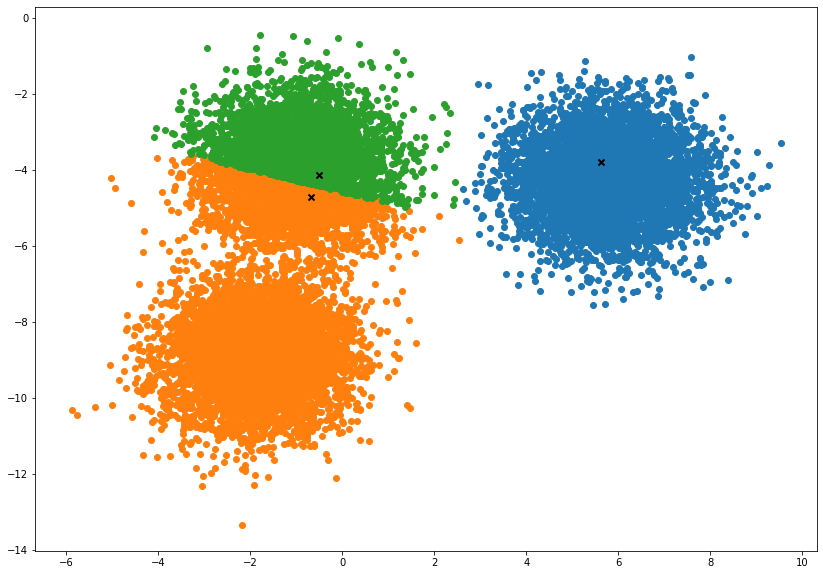

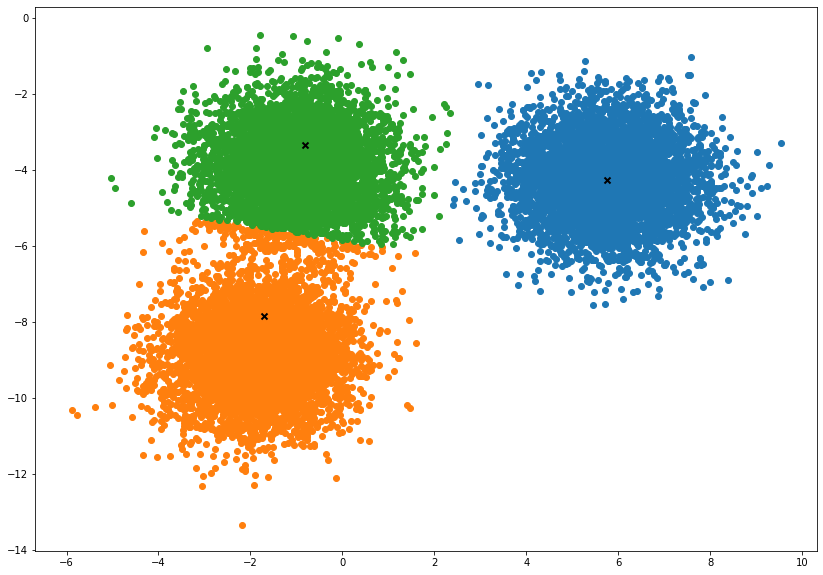

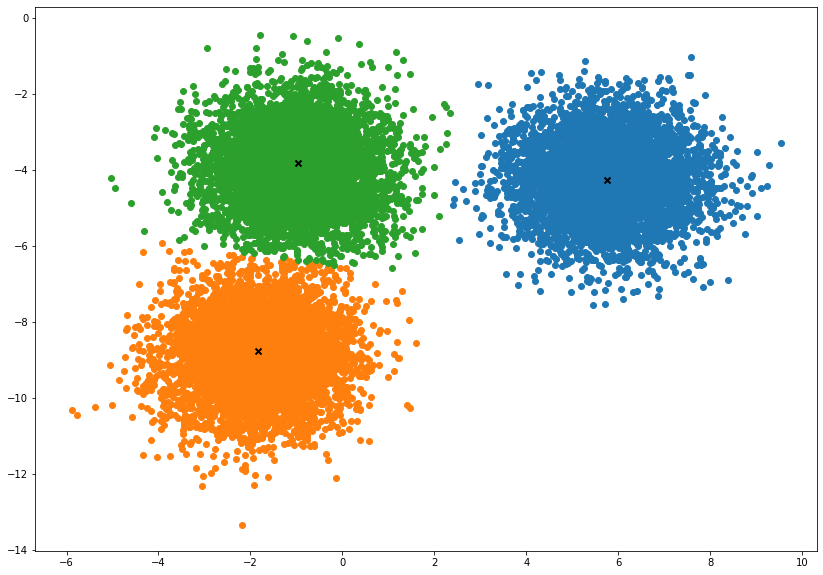

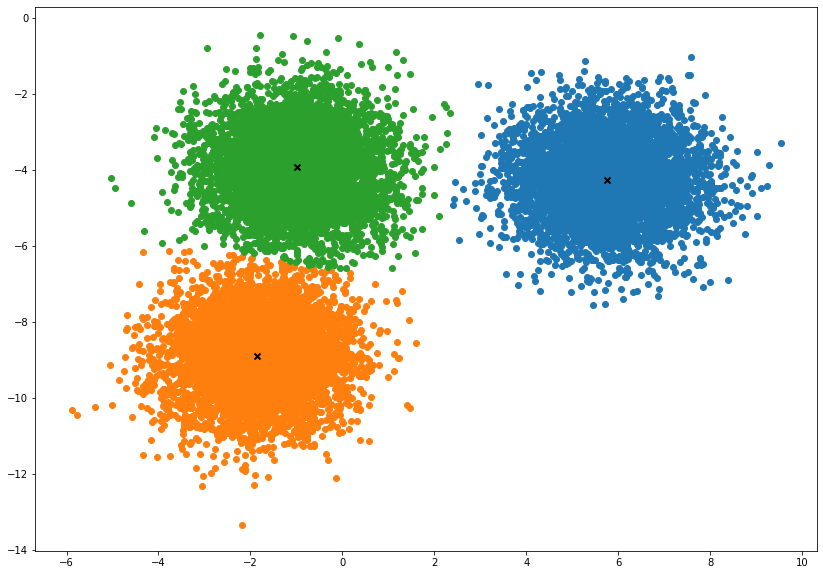

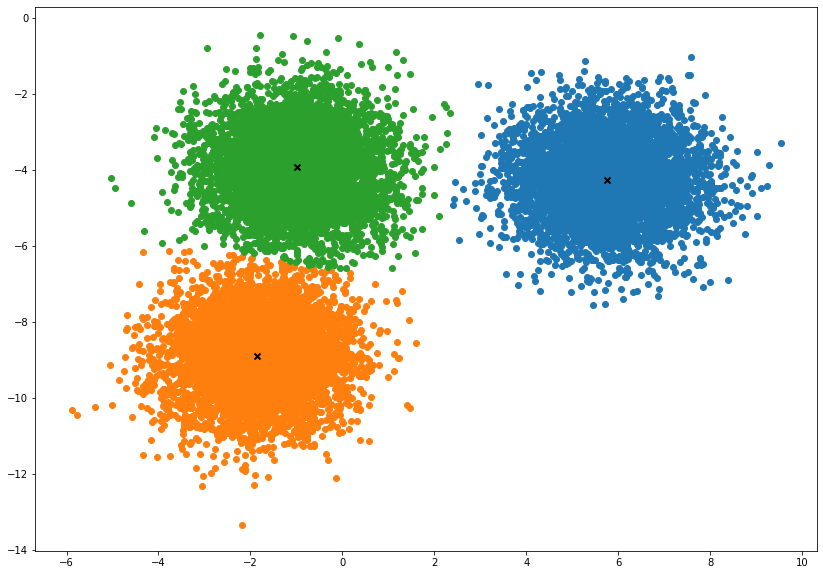

In [11]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=3, n_samples=15000, n_features=2, shuffle=True, random_state=40)
print(X.shape)    
clusters = len(np.unique(y))
print(clusters)
labels=predict(clusters,X,200,plot_steps=True)

In [12]:
import pandas as pd

In [13]:
df=pd.read_csv('intrusion_data.csv')
replace={'dos':0, 'normal':1, 'probe':2, 'r2l':3, 'u2r':4}
df['xAttack']=df['xAttack'].replace(to_replace=replace)

In [14]:
arr=df.to_numpy()

In [15]:
print(np.unique(arr[:,-1],return_counts=True))

(array([0., 1., 2., 3., 4.]), array([ 9114, 13364,  2313,   197,    10], dtype=int64))


In [16]:
data=arr[:,:-1]
labels=arr[:,-1]

In [17]:
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
sample_data=standardized_data
covariance_matrix=np.matmul(sample_data.T,sample_data)

In [18]:
print(covariance_matrix.shape)

(29, 29)


In [19]:
from scipy.linalg import eigh
eig_values, vectors = eigh(covariance_matrix)
values=eig_values[::-1]
eigsum=0
total_sum=np.sum(values)
print("total_sum :",total_sum)
for i in range(len(values)):
    eigsum+=values[i]
    print("eigen_Value",values[i])
    print("variance explained till ",i,"th value :",eigsum/total_sum)

total_sum : 724941.9999999999
eigen_Value 168427.78870918398
variance explained till  0 th value : 0.23233277794524804
eigen_Value 121583.98895891388
variance explained till  1 th value : 0.400048248919359
eigen_Value 65318.24685121277
variance explained till  2 th value : 0.49014959061457425
eigen_Value 47200.590115733256
variance explained till  3 th value : 0.5552590616008508
eigen_Value 36805.35865350422
variance explained till  4 th value : 0.606029135142602
eigen_Value 33607.33898110836
variance explained till  5 th value : 0.6523877941540931
eigen_Value 28418.285440515858
variance explained till  6 th value : 0.6915885653061519
eigen_Value 26396.636295405788
variance explained till  7 th value : 0.7280006317823745
eigen_Value 25148.47916027238
variance explained till  8 th value : 0.7626909644714344
eigen_Value 24940.682312864537
variance explained till  9 th value : 0.7970946578881002
eigen_Value 24069.22951525487
variance explained till  10 th value : 0.8302962512779919
eigen_

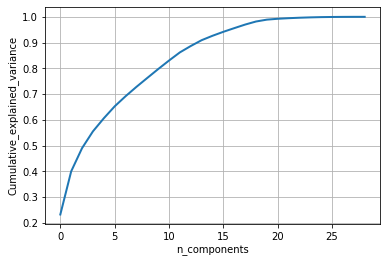

In [20]:
eigsum=0
total_sum=np.sum(values)
cum_var_explained=[]
for i in range(len(values)):
    eigsum+=values[i]
    cum_var_explained.append(eigsum/total_sum)
    
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


In [21]:
values_used, vectors_used = eigh(covariance_matrix,eigvals=(13,28))
print(values_used)
print("Shape of eigen vectors = ",vectors_used.shape)
vectors_used=vectors_used.T
print("Updated shape of eigen vectors = ",vectors_used.shape)

[ 11186.92381329  12419.93150064  16391.10842165  17922.78462427
  22973.03473737  24069.22951525  24940.68231286  25148.47916027
  26396.63629541  28418.28544052  33607.33898111  36805.3586535
  47200.59011573  65318.24685121 121583.98895891 168427.78870918]
Shape of eigen vectors =  (29, 16)
Updated shape of eigen vectors =  (16, 29)


In [22]:
new_coordinates = np.matmul(vectors_used, sample_data.T)
print (" resultanat new data points' shape ", vectors_used.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (16, 29) X (29, 24998)  =  (16, 24998)


In [23]:
new_coordinates = np.vstack((new_coordinates, labels)).T

In [24]:
new_coordinates

array([[-0.38384252,  0.92776458,  0.38005752, ...,  0.95211804,
        -2.5094652 ,  1.        ],
       [-0.20892288, -0.67590494,  0.26401512, ..., -5.59820431,
         1.19325993,  0.        ],
       [-0.07202693,  0.76971996,  0.42961525, ...,  0.90893971,
        -2.44710014,  1.        ],
       ...,
       [ 0.06995507, -1.78539763,  1.79863104, ..., -0.30987759,
        -0.21467653,  1.        ],
       [ 0.59196613, -0.42377194, -0.71357289, ...,  0.54644603,
        -3.46663135,  2.        ],
       [ 0.06656733,  0.10865802,  0.2188317 , ...,  1.12480793,
         4.01832089,  0.        ]])

In [26]:
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st", "2nd","3rd","4th","5th","6th","7th","8th","9th","10th","11th","12th","13th","14th","15th","16th", "label"))
print(dataframe.head())

        1st       2nd       3rd       4th       5th       6th       7th  \
0 -0.383843  0.927765  0.380058  0.478762 -0.085031  0.015486  0.037055   
1 -0.208923 -0.675905  0.264015 -0.430118 -0.064368 -0.028094 -0.079392   
2 -0.072027  0.769720  0.429615  0.754361 -0.050482 -0.005995 -0.084798   
3 -0.477130 -1.167963  0.408404  0.542295  0.362929 -0.050151 -0.061836   
4 -0.031437  0.331852 -0.071333 -0.072667 -0.041691  0.013467 -0.004357   

        8th       9th      10th      11th      12th      13th      14th  \
0 -0.115930  0.122968 -0.073176  0.264136  0.465568 -0.089474  0.080576   
1  0.243678 -0.190286  0.541853  1.629214  0.813104 -1.130964  0.270796   
2 -0.088160  0.161767 -0.098461  0.170783  0.822739 -0.031070  0.060319   
3  0.161913 -0.026994 -0.015911 -0.596465  0.166214  0.266452 -0.004162   
4  0.012687 -0.038172  0.278506  0.561608 -0.537147 -0.252378  0.050828   

       15th      16th  label  
0  0.952118 -2.509465    1.0  
1 -5.598204  1.193260    0.0  
2  0.

In [27]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 17 columns):
1st      24998 non-null float64
2nd      24998 non-null float64
3rd      24998 non-null float64
4th      24998 non-null float64
5th      24998 non-null float64
6th      24998 non-null float64
7th      24998 non-null float64
8th      24998 non-null float64
9th      24998 non-null float64
10th     24998 non-null float64
11th     24998 non-null float64
12th     24998 non-null float64
13th     24998 non-null float64
14th     24998 non-null float64
15th     24998 non-null float64
16th     24998 non-null float64
label    24998 non-null float64
dtypes: float64(17)
memory usage: 3.2 MB
None


In [28]:
X_arr=np.array(dataframe)
y=X_arr[:,-1]
print(X_arr.shape)
print(y.shape)
X=X_arr[:,:-1]

(24998, 17)
(24998,)


In [29]:
X

array([[ -0.38384252,   0.92776458,   0.38005752, ...,   0.08057552,
          0.95211804,  -2.5094652 ],
       [ -0.20892288,  -0.67590494,   0.26401512, ...,   0.27079558,
         -5.59820431,   1.19325993],
       [ -0.07202693,   0.76971996,   0.42961525, ...,   0.06031922,
          0.90893971,  -2.44710014],
       ...,
       [  0.06995507,  -1.78539763,   1.79863104, ..., -13.72729864,
         -0.30987759,  -0.21467653],
       [  0.59196613,  -0.42377194,  -0.71357289, ...,  -0.07443191,
          0.54644603,  -3.46663135],
       [  0.06656733,   0.10865802,   0.2188317 , ...,  -0.06015246,
          1.12480793,   4.01832089]])

In [30]:
print(X.shape)    
clusters = len(np.unique(y))
print(clusters)
labels=predict(clusters,X,150,plot_steps=False)

print(np.unique(labels,return_counts=True))

(24998, 16)
5
(array([0., 1., 2., 3., 4.]), array([  983,  2462,  6901, 14506,   146], dtype=int64))
